## 0. Importado de librerías (valor 0.1) 

**Resuelva los siguientes ejercicios acá mismo en un cuaderno de Jupyter con su nombre, código y la palabra `semana_13`. Importe todas las librerías y funciones que crea convenientes.**
### Estudiante: Francisco Javier Díaz Perdomo COD:201912252
$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\xbr}{\bar{x}}
\newcommand{\ome}{\omega}
\newcommand{\lam}{\lambda}
\newcommand{\dd}{\mathrm{d}}
\newcommand{\ee}{\mathrm{e}}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
\newcommand{\pr}{^{\prime}}
\newcommand{\chinu}{\chi_{\nu}^2}
$$

In [1]:
!python -m pip install pyforest
!python -m pip install matplotlib
!python -m pip install scipy

import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import splrep,splint,splev,BSpline,sproot,splprep,bisplrep,bisplev
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RectBivariateSpline
%matplotlib inline

# 1. Interpolando una curva paramétrica

Los siguientes son un conjunto de 41 datos de la curva paramétrica
$$
\rv(t)=x(t)\iun+y(t)\jun=\cos(3t)\iun+\sin(2t)\jun \: ,
\tag{1}
$$
la cual representa una figura de Lissajous. Los datos están en el intervalo $t\in\pas{0,2\pi}$. Este primer punto consistirá en resolver ejercicios de interpolación con estos datos `ti,xi,yi`.

## 1.1. Interpolación de la función $y(t)$ (Valor 1.25)

Sea $L_y(t)$ la función interpolante de los datos `ti,yi`. Haga una gráfica que muestre la segunda derivada $L_y^{\prime\prime} (t)$ (asegúrese de que esta derivada sea suave) y compárela con la gráfica de la función $y^{\prime\prime}(t)=-4sin(2t)$. Estas gráficas deben mostrarse partiendo el intervalo $\pas{0,2\pi}$ en 201 puntos. Muestre también dentro de la gráfica un `scatter` de los puntos de `ti,yi`. Asegúrese de poner título y leyenda adecuados.


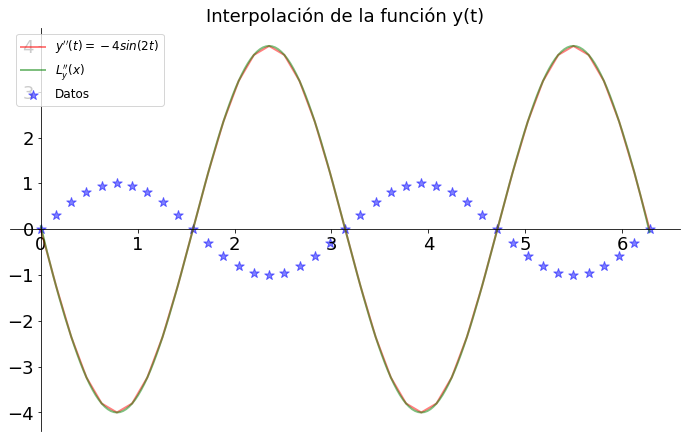

In [2]:
# 1. Interpolando una curva paramétrica
# 1.1. Interpolación de la función y(t)

ti=np.linspace(0,2*np.pi,41)
yi=np.sin(2*ti)
xx=np.linspace(0,2*np.pi,201)
tcky=splrep(ti,yi,k=4)
t,c,k=tcky
Ly=BSpline(t,c,k)
yyL2pp=splev(xx,tcky,der=2)
dy2= -4*np.sin(2*ti)

###################################
# Comienzo de Parte Gráfica
###################################
plt.figure(figsize=(12,12/1.618))

plt.scatter(ti,yi,marker='*',color="b",alpha=0.5,s=100)
plt.plot(ti,dy2,color="red",alpha=0.5,linewidth=2)
plt.plot(xx,yyL2pp,color="green",alpha=0.5,linewidth=2)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend([r'$y^{\prime\prime}(t)=-4sin(2t)$','$L^{\prime\prime}_y(x)$','Datos'],loc='best',\
          fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title("Interpolación de la función y(t)",fontsize=18)
plt.show()

## 1.2. Interpolación de la función $\vec{r}(t)$ (Valor 1.25)

Sea $\vec{L}(t)$ la función interpolante de los datos `ti,xi,yi`. Haga una gráfica que muestre la función $\vec{L}(t)$ (asegúrese de que esta curva sea suave) partiendo el intervalo $t\in\pas{0,2\pi}$ en 201 puntos. Muestre también dentro de la gráfica un `scatter` de los puntos de `xi,yi`. Asegúrese de poner título y leyenda adecuados.

**Recomendación:** Use interpolaciones de $x(t)$ y $y(t)$ por separado, esto le ayudará a completar el punto 3.

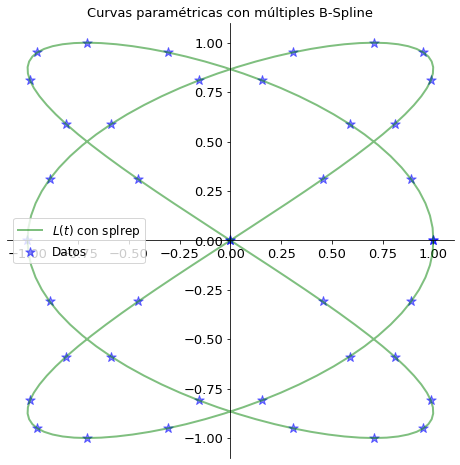

In [3]:
# 1.2. Interpolación de la función r(t)

ti=np.linspace(0,2*np.pi,41)
yi=np.sin(2*ti)
xi=np.cos(3*ti)

################
# Se genera la interpolación
####################
tckx=splrep(ti,xi,k=3)
tcky=splrep(ti,yi,k=3)
xx=np.linspace(0,2*np.pi,201)
xpoints=splev(xx,tckx,der=0)
ypoints=splev(xx,tcky,der=0)
###################################
# Comienzo de Parte Gráfica
###################################
plt.figure(figsize=(8,8))
plt.plot(xpoints,ypoints,color="g",alpha=0.5,linewidth=2)
plt.scatter(xi,yi,marker='*',color="b",alpha=0.5,s=100)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend(['$L( t )$ con splrep','Datos'],loc='best',\
          fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.title("Curvas paramétricas con múltiples B-Spline",fontsize=13)
plt.show()


# 2. Interpolando funciones de dos variables (valor 1.25)

Sea la función de dos variables,
$$
f(x,y)=\sin\pap{yx^4-2x}\cos\pap{x+y^2}\;,
\tag{2}
$$
en el intervalo bidimensional $I:(x,y)\in\pas{-1,1}^2$. Tome una muestra de 21 puntos igualmente espaciados en $x$ y de 31 puntos igualmente espaciados en $y$ para generar una función interpolante $L(x,y)$. Calcule la derivada parcial $\frac{\partial L}{\partial y}$ (asegúrese de que sea suave) y haga una gráfica de superficie de esta derivada parcial en el intervalo $I$. Al lado de esta gráfica (no superpuesta, use `fig.add_subplot`) haga una gráfica de superficie de la función:
$$
\partial_y f(x,y)=x^4\cos\pap{yx^4-2x}\cos\pap{x+y^2}-2y\sin\pap{yx^4-2x}\sin\pap{x+y^2}\;.
\tag{3}
$$
Las dos gráficas de superficie deben partir el intervalo $I$ en una red de $101\times 101$ puntos. Asegúrese de que las dos gráficas tengan un título que diga si son la función interpolada $\partial_y L(x,y)$ o la analítica $\partial_y f(x,y)$. En una celda de **Markdown** comente si estas dos gráficas de superficie se parecen o no.

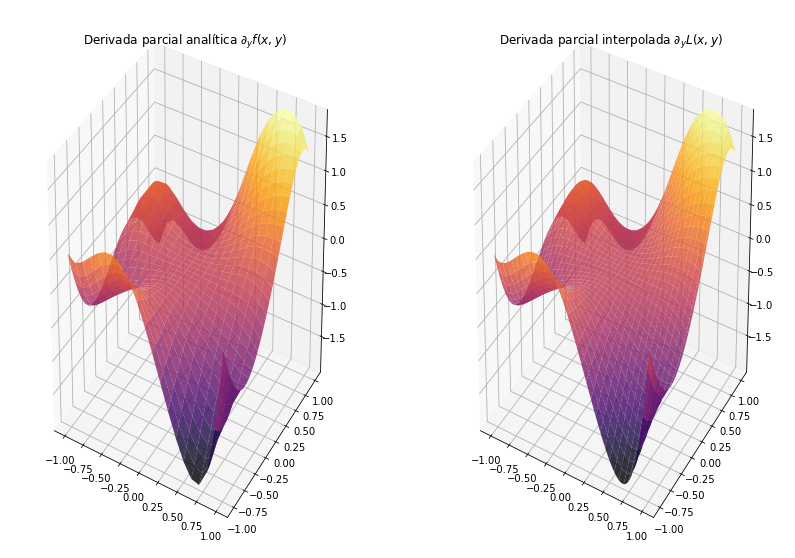

In [4]:
# 2. Interpolando funciones de dos variables 

f = lambda x,y: np.sin(y*x**4-2*x)*np.cos(x+y**2)
dyf= lambda x,y:(x**4)*np.cos(y*x**4-2*x)*np.cos(x+y**2)-(2*y)*np.sin(y*x**4-2*x)*np.sin(x+y**2)

x,y = np.linspace(-1, 1, 21),np.linspace(-1, 1, 31)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
dZ = dyf(X,Y)
Lxy = RectBivariateSpline(y,x,Z,kx=4,ky=4)

x2,y2 = np.linspace(-1, 1, 101),np.linspace(-1, 1, 101)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = Lxy(y2,x2,dx=1)

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(121,projection="3d",fc=(0,0,0,0),title= "Derivada parcial analítica $\partial_y f(x,y)$")
ax2 = fig.add_subplot(122,projection="3d",fc=(0,0,0,0),title ="Derivada parcial interpolada $\partial_y L(x,y)$")
ax1.plot_surface(X,Y,dZ,cmap="inferno",alpha=0.8,edgecolor="none")
ax2.plot_surface(X2,Y2,Z2,cmap="inferno",alpha=0.8,edgecolor="none")
plt.show()

# 3. Confirmación del teorema fundamental del cálculo (valor 1.15)

En los puntos anteriores se generaron interpolaciones de las funciones $x(t)$, $y(t)$ y $f(x,y)$. Queremos confirmar que la siguiente identidad se cumple:
$$
\Delta f=f(-1,0)-f(1,0)=\int_{\vec{r}_0}^{\vec{r}_1}\nabla f \cdot \dd \vec{r} =\int_0^{\pi} g(t) \dd t \;,
\tag{4}
$$
donde
$$
g(t)=\frac{\partial f}{\partial x}\frac{d x}{dt}+\frac{\partial f}{\partial y}\frac{d y}{dt} \;.
\tag{5}
$$
Entiéndase que $\frac{\partial f}{\partial x}=\partial_x f (x(t),y(t))$ y $\frac{\partial f}{\partial y}=\partial_y f (x(t),y(t))$. 

Queremos confirmar la ecuación (4) con las funciones interpoladas, no las analíticas. Para eso, defina una función,
$$
L_g(t)=\frac{\partial L_f}{\partial x}\frac{d L_x}{dt}+\frac{\partial L_f}{\partial y}\frac{d L_y}{dt}\;.
\tag{6}
$$
Luego defina un *array* `tti` del intervalo $\pas{0,\pi}$ con 201 puntos. Con este *array* genere otro *array* `ggi` que evalúe $L_g$ en cada punto de `tti`. Genere datos de interpolación con los *array* `tti,ggi` (use *B-Splines* de grado 4) y mediante la función `splint` calcule la integral del lado derecho de la ecuación (4). Mediante un `print` compare esta integral de la interpolación con el valor de $\Delta f$. 

In [5]:
# 3. Confirmación del teorema fundamental del cálculo
#Para la función definida en el punto 2 con la parametrización del punto 1 :
ti=np.linspace(0,np.pi,201)
f = lambda x,y: np.sin(y*x**4-2*x)*np.cos(x+y**2)
dfdx= lambda x,y:(4*y*x**3-2)*np.cos(y*x**4-2*x)*np.cos(x+y**2)-np.sin(y*x**4-2*x)*np.sin(x+y**2)
dfdy= lambda x,y:(x**4)*np.cos(y*x**4-2*x)*np.cos(x+y**2)-(2*y)*np.sin(y*x**4-2*x)*np.sin(x+y**2)
x= lambda t:np.cos(3*t)
y= lambda t:np.sin(2*t)
dxdt= lambda t: -3*np.sin(3*t)
dydt= lambda t: 2*np.cos(2*t)
g= lambda t: dfdx(x(t),y(t))*dxdt(t)+dfdy(x(t),y(t))*dydt(t)

tckx=splrep(ti,x(ti),k=4)
tcky=splrep(ti,y(ti),k=4)
def Lg(t):
    x=splev(t,tckx,der=0)
    y=splev(t,tcky,der=0)
    dx=splev(t,tckx,der=1)
    dy=splev(t,tcky,der=1)
    dLx=Lxy(y,x,dy=1)[0,0]
    dLy=Lxy(y,x,dx=1)[0,0]
    return dLx*dx+dLy*dy
ggi=[]
for t in ti:
    ggi.append(Lg(t))
ggi =np.array(ggi)
tckg= splrep(ti,ggi,k=4)
LINT=splint(0,np.pi,tckg)  

print ("El valor de la integral utilizando las funciones analíticas es :",splint(0,np.pi,splrep(ti,g(ti),k=4)))
print ("El valor de la integral utilizando la interpolación :", LINT)
print("El valor de la integral utilizando el teorema fundamental del cálculo es:" ,f(-1,0)-f(1,0))


El valor de la integral utilizando las funciones analíticas es : 0.9825909123548484
El valor de la integral utilizando la interpolación : 0.9825904929582002
El valor de la integral utilizando el teorema fundamental del cálculo es: 0.9825909928677639
